In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [8]:
import pandas as pd
titanic_data = pd.read_csv("/content/train.csv")
missing_values = titanic_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
titanic_data.shape

(891, 12)

In [13]:
titanic_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [14]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
#Impute missing values for Age and Embarked
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [18]:
#drop the cabin column due to many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

In [19]:
#check the missing values after imputation
print("\nMissing values after imputation:")
print(titanic_data.isnull().sum())


Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
#Ensure 'sex' and 'Embarked' columns are enclosed as numeric values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [23]:
#Exclude non-numeric columns from the correlation matrix
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
correlation_matrix = titanic_data[numeric_columns].corr()

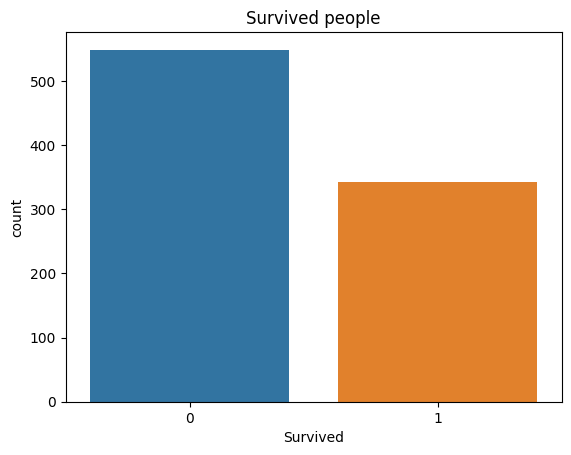

In [24]:
#countplot of survivors
sns.countplot(data=titanic_data, x='Survived')
plt.title("Survived people")
plt.show()

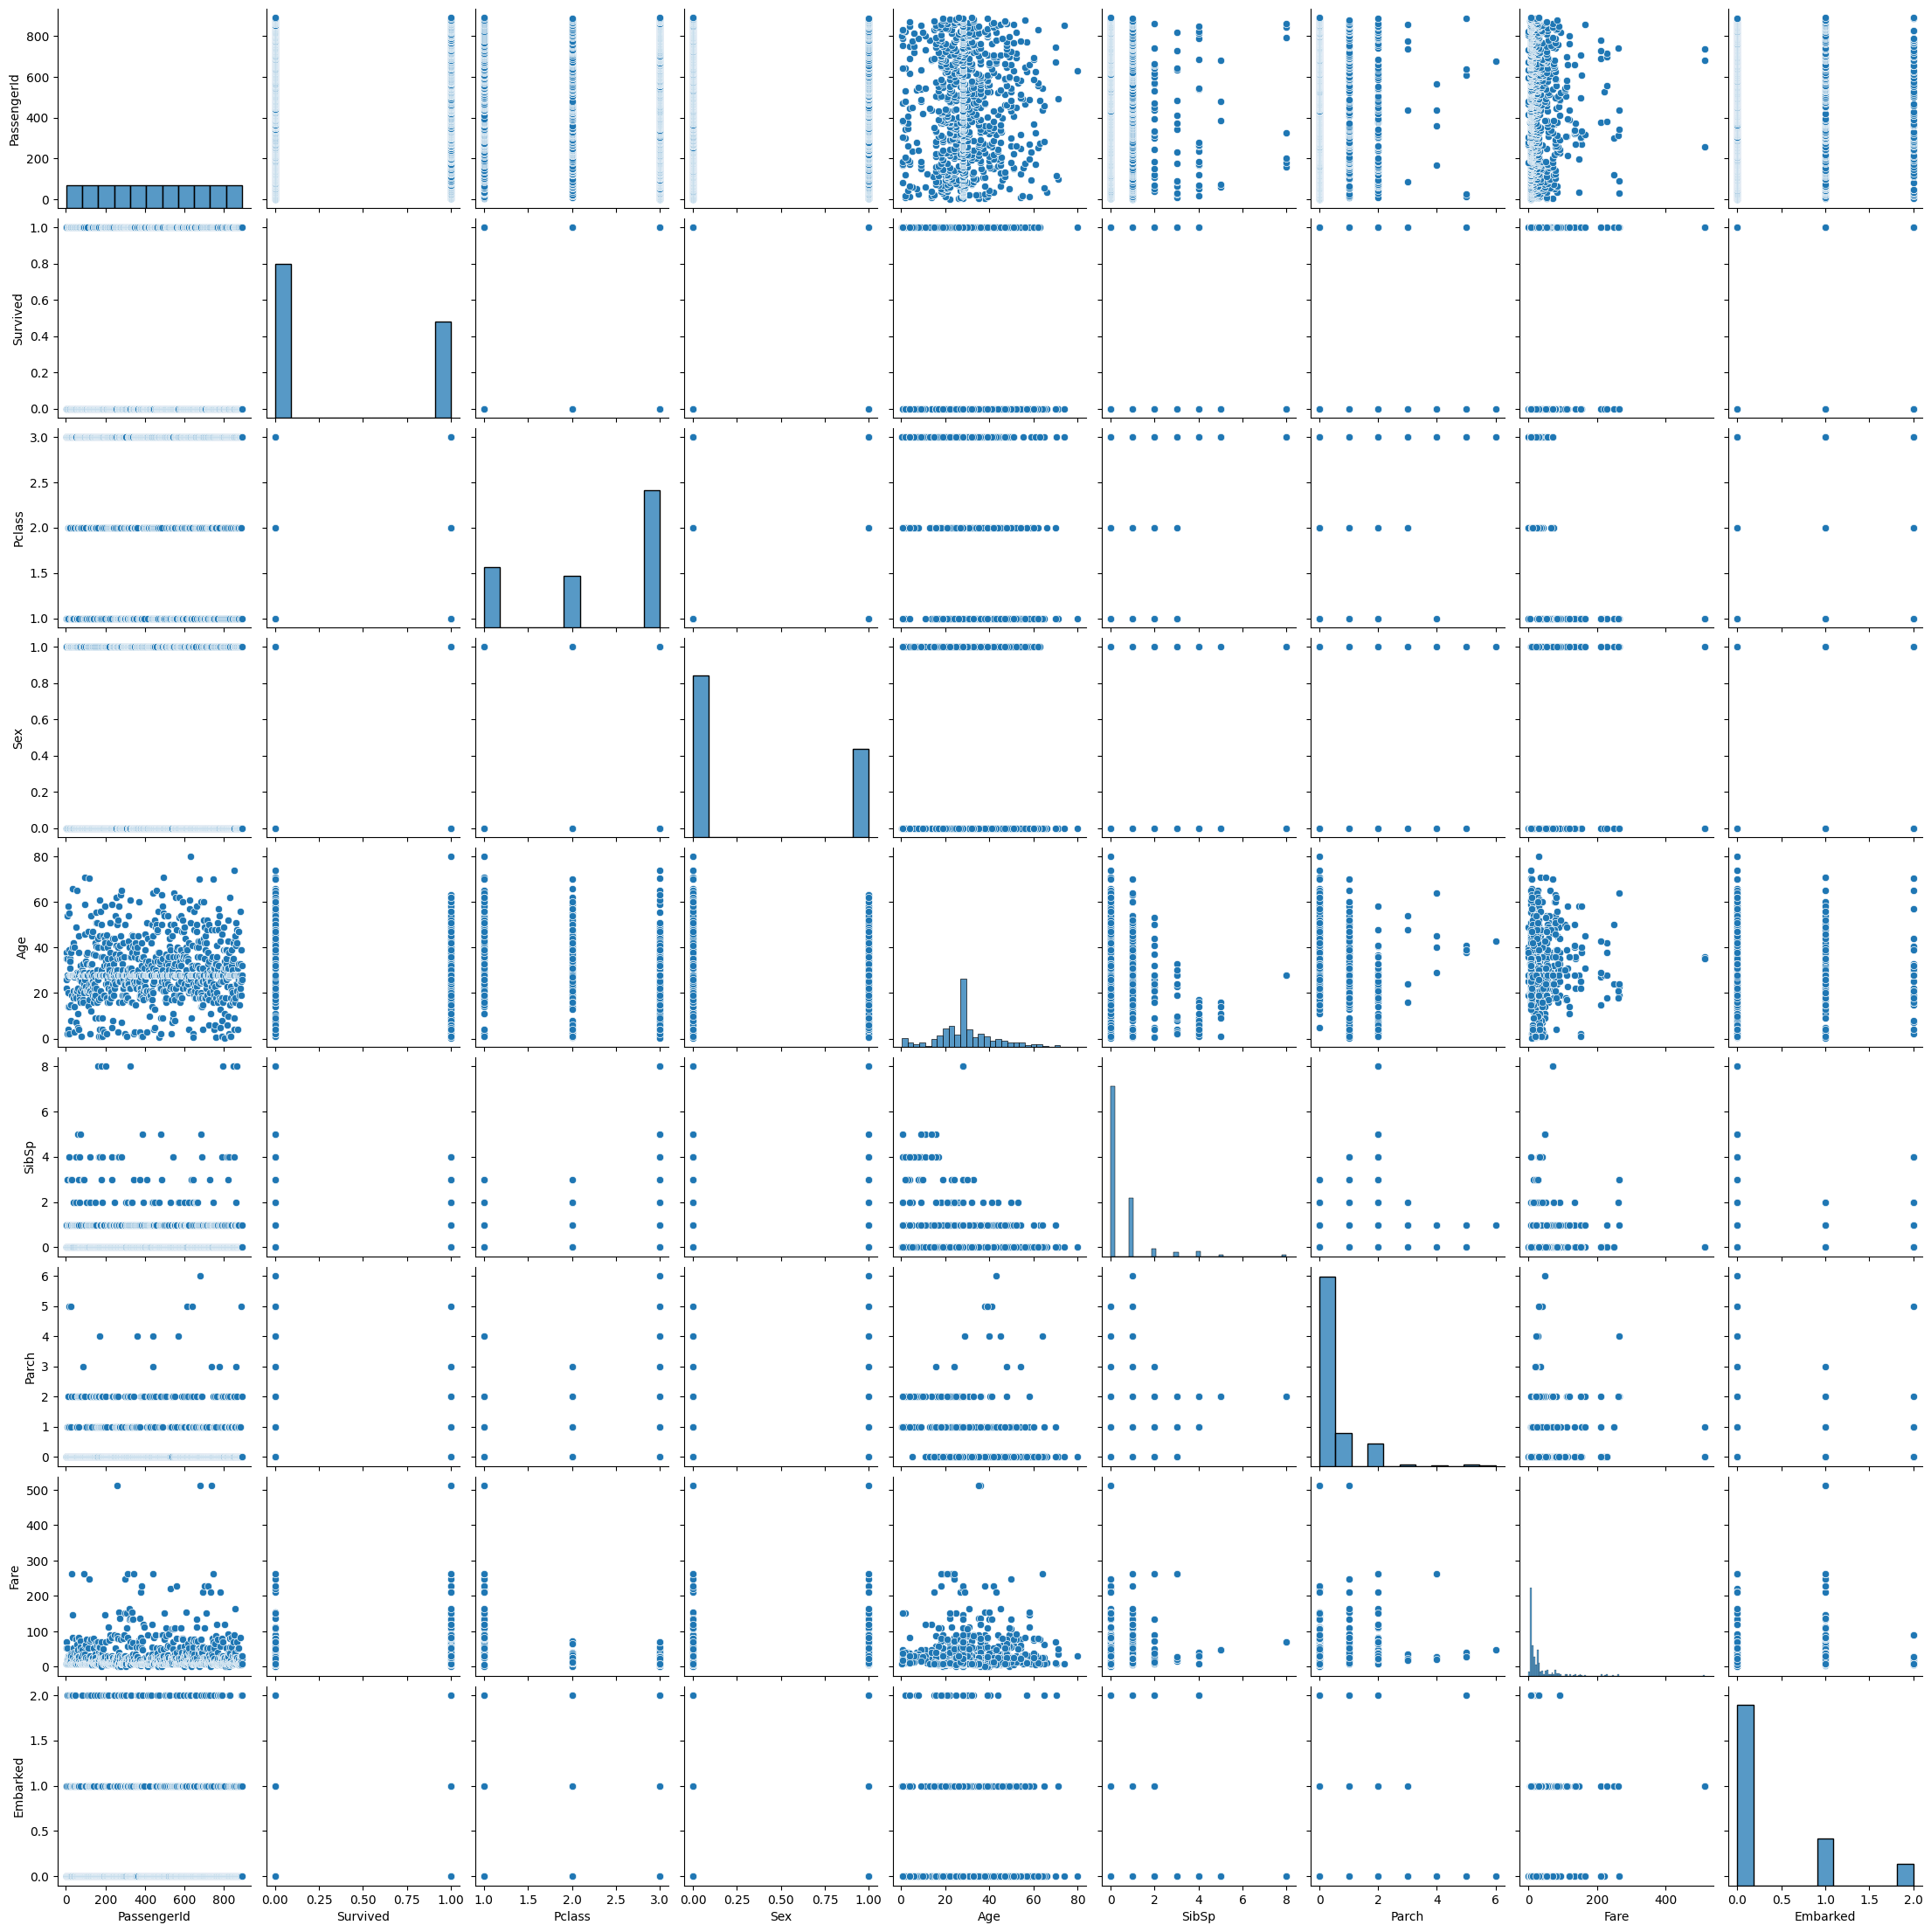

In [25]:
sns.pairplot(titanic_data)

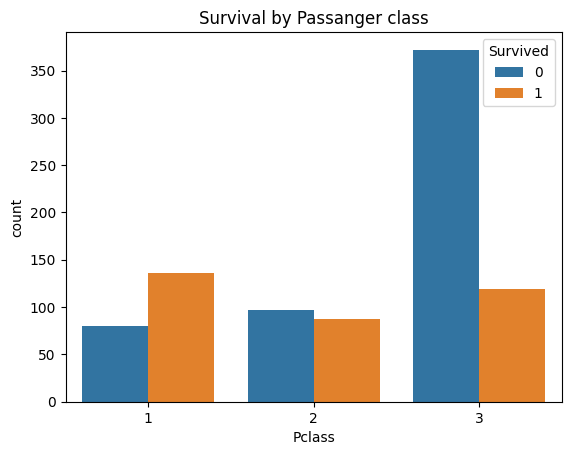

In [26]:
#Relationship between Pclass and Survival
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title("Survival by Passanger class")
plt.show()

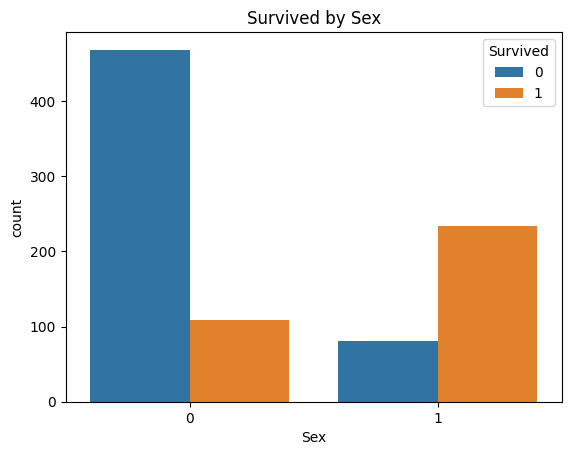

In [27]:
#Relationship between Sex and Survived
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title("Survived by Sex")
plt.show()

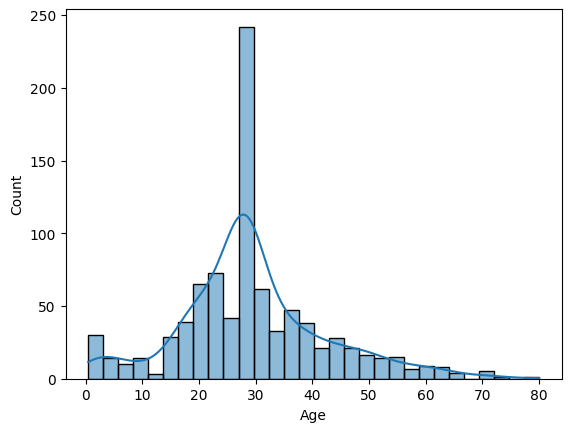

In [28]:
#Age distribution
sns.histplot(data=titanic_data, x='Age', kde=True)
plt.show()

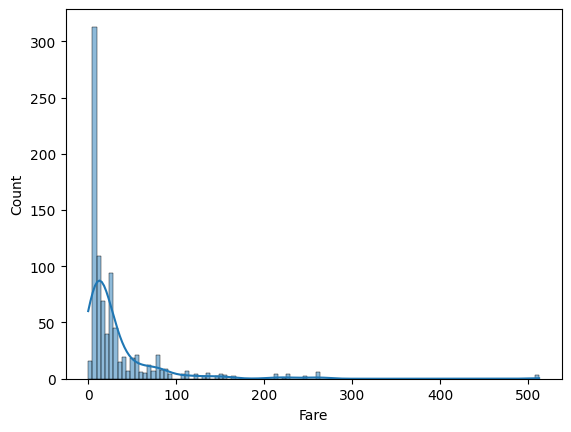

In [29]:
#Fare Distribution
sns.histplot(data=titanic_data, x='Fare', kde=True)
plt.show()

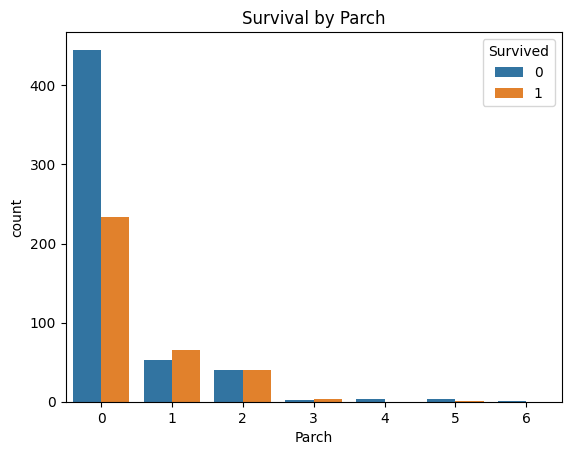

In [30]:
#Relationship between Parch and Survival
sns.countplot(data=titanic_data, x='Parch', hue='Survived')
plt.title("Survival by Parch")
plt.show()

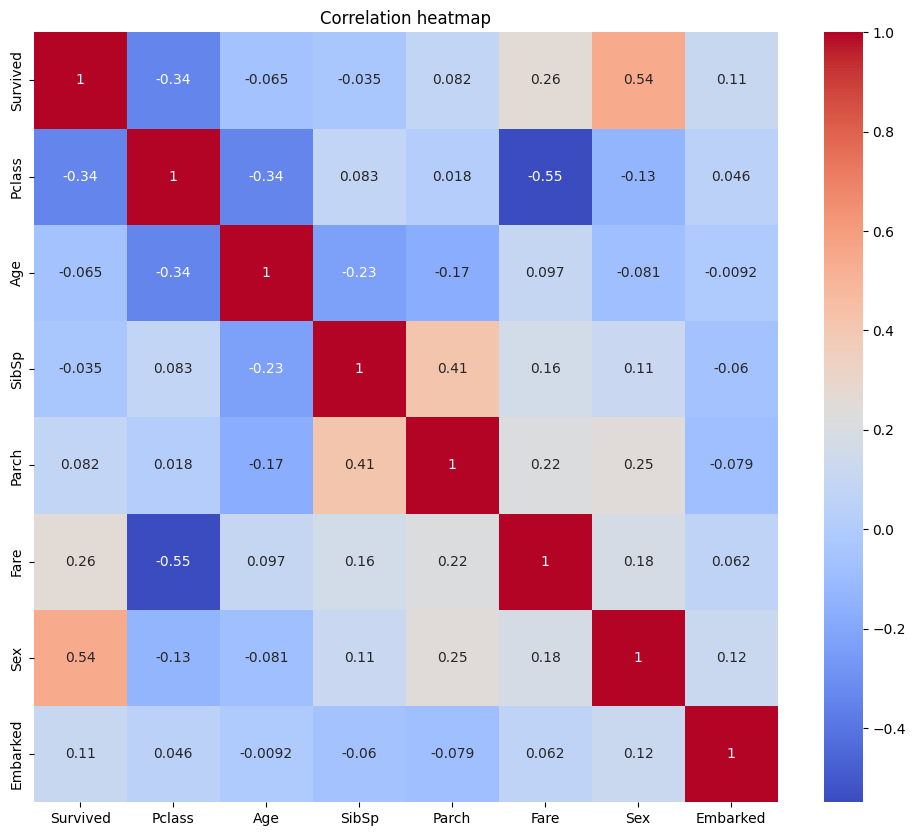

In [32]:
#Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()